# COVID-19 Model

__Importing Modules__

In [39]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

__Loading the Dataset__

In [40]:
confirmed_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
recovered_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
india_url = "https://api.covid19india.org/csv/latest/states.csv"

In [41]:
conf_df = pd.read_csv(confirmed_url)
rec_df = pd.read_csv(recovered_url)
deaths_df = pd.read_csv(deaths_url)
india_df = pd.read_csv(india_url)

_______________________________________________________________________________________________________________________________

## Inspecting Data

__Shape and Size__

In [42]:
conf_df.shape, conf_df.size

((266, 250), 66500)

In [43]:
conf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 250 entries, Province/State to 9/23/20
dtypes: float64(2), int64(246), object(2)
memory usage: 519.7+ KB


__Unique Values__

In [44]:
conf_df.nunique()

Province/State     81
Country/Region    188
Lat               262
Long              263
1/22/20            11
                 ... 
9/19/20           258
9/20/20           257
9/21/20           255
9/22/20           257
9/23/20           256
Length: 250, dtype: int64

In [45]:
conf_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38772,38815,38855,38872,38883,38919,39044,39074,39096,39145
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11520,11672,11816,11948,12073,12226,12385,12535,12666,12787
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,48496,48734,48966,49194,49413,49623,49826,50023,50214,50400
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1438,1438,1483,1483,1564,1564,1564,1681,1681,1753
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,3439,3569,3675,3789,3848,3901,3991,4117,4236,4363


__Data from India__

In [47]:
india_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6917 entries, 0 to 6916
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6917 non-null   object 
 1   State      6917 non-null   object 
 2   Confirmed  6917 non-null   int64  
 3   Recovered  6917 non-null   int64  
 4   Deceased   6917 non-null   int64  
 5   Other      6917 non-null   int64  
 6   Tested     6167 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 378.4+ KB


In [48]:
india_df.loc[india_df.State == "India"]

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
1,2020-01-30,India,1,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
5,2020-02-03,India,3,0,0,0,NaN
7,2020-02-14,India,3,3,0,0,NaN
11,2020-03-02,India,5,3,0,0,NaN
...,...,...,...,...,...,...,...
6769,2020-09-20,India,5485627,4392669,87909,783,64392594.0
6805,2020-09-21,India,5560120,4494739,88965,799,65325779.0
6841,2020-09-22,India,5643481,4584392,90050,809,66279462.0
6877,2020-09-23,India,5730184,4671850,91173,819,66279462.0


In [49]:
india_df.nunique()

Date          211
State          37
Confirmed    4576
Recovered    3995
Deceased     1715
Other         194
Tested       5600
dtype: int64

In [50]:
india_df.shape, india_df.size

((6917, 7), 48419)

## Cleaning Data

In [51]:
india_df = india_df[india_df.State == "India"]

In [52]:
india_df["Tested"].fillna(india_df["Confirmed"].diff(), inplace = True)

In [53]:
india_df["Date"] = pd.to_datetime(india_df["Date"])

In [54]:
india_df.drop("State", axis = 1, inplace = True)

In [55]:
conf_df.drop(["Long", "Lat"], axis = 1, inplace = True)
rec_df.drop(["Long", "Lat"], axis = 1, inplace = True)
deaths_df.drop(["Long", "Lat"], axis = 1, inplace = True)

In [56]:
conf_df = conf_df.groupby("Country/Region").sum()
rec_df = rec_df.groupby("Country/Region").sum()
deaths_df = deaths_df.groupby("Country/Region").sum()

## Preparing Data

In [57]:
india_df["Active"] = india_df["Confirmed"] - india_df["Recovered"] - india_df["Deceased"] - india_df["Other"]

In [62]:
india_df["Deceased"] = india_df["Deceased"] + india_df["Other"]

In [67]:
india_df.drop("Other", axis = 1, inplace = True)

In [58]:
conf_df = conf_df.sum()
rec_df = rec_df.sum()
deaths_df = deaths_df.sum()

In [70]:
global_df = pd.DataFrame()
global_df["Confirmed"] = conf_df
global_df["Recovered"] = rec_df
global_df["Deceased"] = deaths_df

In [135]:
global_df["Active"] = global_df["Confirmed"] - global_df["Recovered"] - global_df["Deceased"]

In [150]:
global_df.head()

,Confirmed,Recovered,Deceased,Active
1/22/20,555,28,17,510
1/23/20,654,30,18,606
1/24/20,941,36,26,879
1/25/20,1434,39,42,1353
1/26/20,2118,52,56,2010


In [151]:
global_df.columns = ["confirmed", "recovered", "deceased", "active"]

In [152]:
india_df.head()

,Date,Confirmed,Recovered,Deceased,Tested,Active
1,2020-01-30,1,0,0,NaN,1
3,2020-02-02,2,0,0,1.0,2
5,2020-02-03,3,0,0,1.0,3
7,2020-02-14,3,3,0,0.0,0
11,2020-03-02,5,3,0,2.0,2


In [157]:
india_df.set_index("Date", inplace = True)

In [158]:
india_df.columns = ["confirmed", "recovered", "deceased", "tested", "active"]

In [175]:
global_df["active_growth"] = global_df["active"].diff()
india_df["active_growth"] = india_df["active"].diff()

In [181]:
global_df["growth"] = global_df["confirmed"].diff()
india_df["growth"] =  india_df["confirmed"].diff()

In [173]:
global_df["case_fatality_rate"] = global_df["deceased"].div(global_df["confirmed"]) * 100
india_df["case_fatality_rate"] = india_df["deceased"].div(india_df["confirmed"]) * 100

## Visualizing Data from India

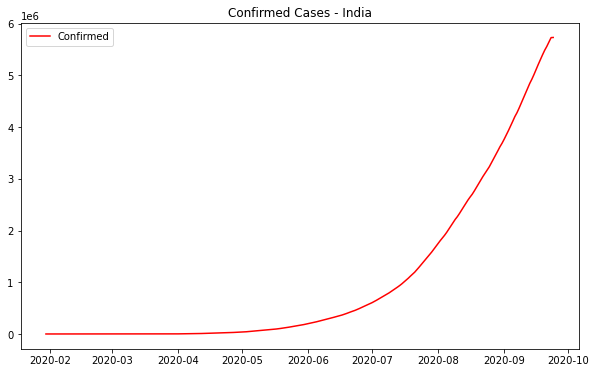

In [162]:
fig = plt.figure(figsize = (10, 6))

axis0 = fig.add_subplot(1, 1 , 1)
axis0.set_title("Confirmed Cases - India")
axis0.plot(india_df["confirmed"], color = "red", label = "Confirmed")
axis0.legend();

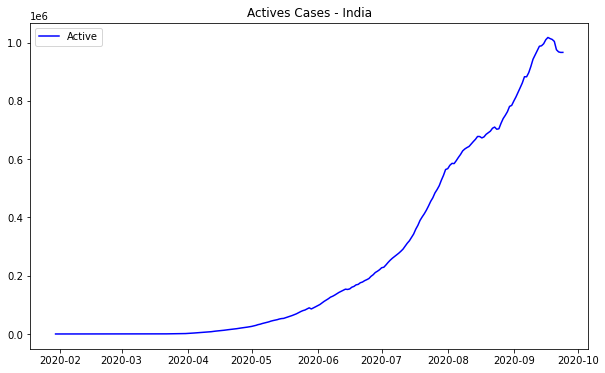

In [163]:
fig = plt.figure(figsize = (10, 6))

axis1 = fig.add_subplot(1, 1 , 1)
axis1.set_title("Actives Cases - India")
axis1.plot(india_df["active"], color = "blue", label = "Active")
axis1.legend();

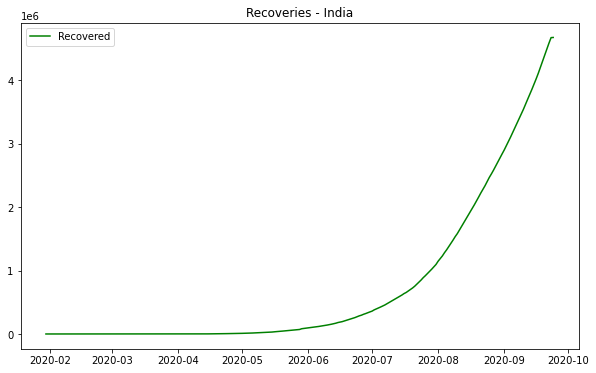

In [164]:
fig = plt.figure(figsize = (10, 6))

axis2 = fig.add_subplot(1, 1, 1)
axis2.set_title("Recoveries - India")
axis2.plot(india_df["recovered"], color = "green", label = "Recovered")
axis2.legend();

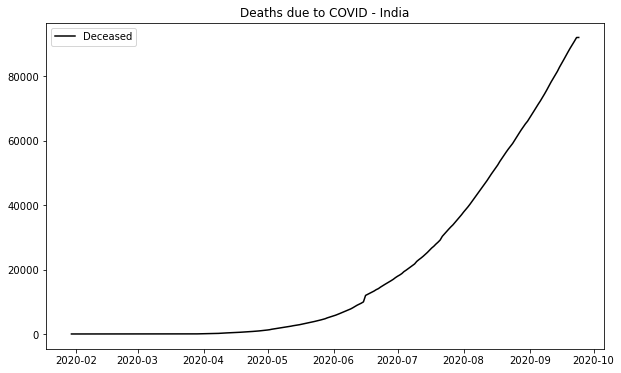

In [165]:
fig = plt.figure(figsize = (10, 6))

axis3 = fig.add_subplot(1, 1, 1)
axis3.set_title("Deaths due to COVID - India")
axis3.plot(india_df["deceased"], color = "black", label = "Deceased")
axis3.legend()

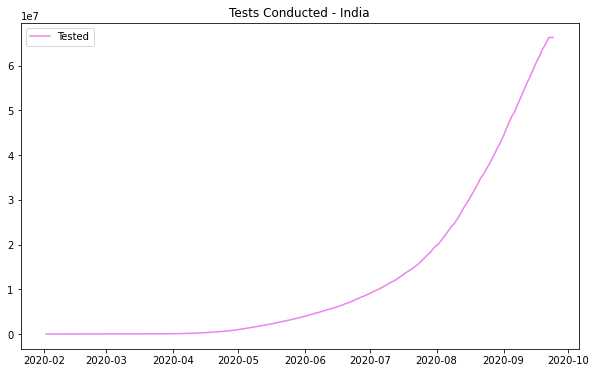

In [167]:
fig = plt.figure(figsize = (10, 6))

axis4 = fig.add_subplot(1, 1, 1)
axis4.set_title("Tests Conducted - India")
axis4.plot(india_df["tested"], color = "violet", label = "Tested")
axis4.legend()

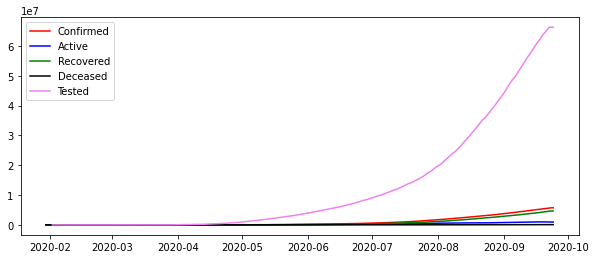

In [168]:
fig = plt.figure(figsize = (10, 4))

axis = fig.add_subplot(1, 1, 1)
axis.plot(india_df["confirmed"], color = "red", label = "Confirmed")
axis.plot(india_df["active"], color = "blue", label = "Active")
axis.plot(india_df["recovered"], color = "green", label = "Recovered")
axis.plot(india_df["deceased"], color = "black", label = "Deceased")
axis.plot(india_df["tested"], color = "violet", label = "Tested")
axis.legend()
plt.show()

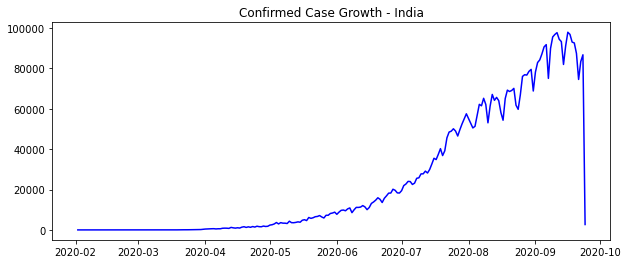

In [183]:
fig = plt.figure(figsize = (10, 4))

axis = fig.add_subplot(1, 1 , 1)
axis.set_title("Confirmed Case Growth - India")
axis.plot(india_df["growth"], color = "blue");

In [184]:
india_df["growth"].max()

97860.0

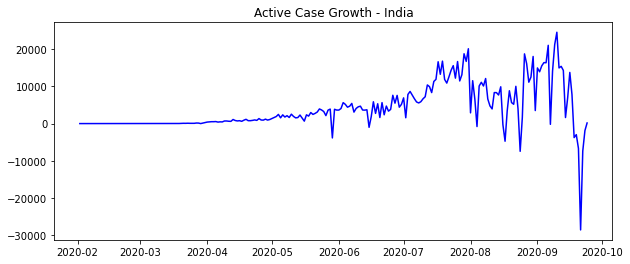

In [179]:
fig = plt.figure(figsize = (10, 4))

axis = fig.add_subplot(1, 1 , 1)
axis.set_title("Active Case Growth - India")
axis.plot(india_df["active_growth"], color = "blue");